In [9]:
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
import multidop
import pyart
import tempfile
import os
import glob
import time


from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr
import pyart

# f1 = r"/home/liyuan3970/study_demo/met_plot/rader/pup/pintu/Z_RADR_I_Z9571_20190809172500_O_DOR_SA_CAP.bin.bz2"
# f2 = r"/home/liyuan3970/study_demo/met_plot/rader/pup/pintu/Z_RADR_I_Z9577_20190809172500_O_DOR_SA_CAP.bin.bz2"

f1 = "Z_RADR_I_Z9576_20190809160200_O_DOR_SA_CAP.bin.bz2"
f2 = "Z_RADR_I_Z9577_20190809160100_O_DOR_SA_CAP.bin.bz2"
basedata1 = radar_io(f1) 
basedata2 = radar_io(f2)

r1 = basedata1.ToPyartRadar()
r2 = basedata2.ToPyartRadar()


cp1 = deepcopy(r1.fields['reflectivity']['data'])
r1.add_field_like('reflectivity', 'DT', cp1, replace_existing=True)
gatefilter1 = pyart.correct.GateFilter(r1)
gatefilter1.exclude_masked('reflectivity')
corr_vel1 = pyart.correct.dealias_region_based(
    r1, vel_field='velocity', keep_original=False, 
    gatefilter=gatefilter1, centered=True)
r1.add_field('VT', corr_vel1, replace_existing=True)



cp2 = deepcopy(r2.fields['reflectivity']['data'])
r2.add_field_like('reflectivity', 'DT', cp2, replace_existing=True)
gatefilter2 = pyart.correct.GateFilter(r2)
gatefilter2.exclude_masked('reflectivity')
corr_vel2 = pyart.correct.dealias_region_based(
    r2, vel_field='velocity', keep_original=False, 
    gatefilter=gatefilter2, centered=True)
r2.add_field('VT', corr_vel2, replace_existing=True)



# The analysis engine currently expects the "missing_value" attribute
r1.fields['DT']['missing_value'] = 1.0 * r1.fields['DT']['_FillValue']
r2.fields['DT']['missing_value'] = 1.0 * r2.fields['DT']['_FillValue']
r1.fields['VT']['missing_value'] = 1.0 * r1.fields['VT']['_FillValue']
r2.fields['VT']['missing_value'] = 1.0 * r2.fields['VT']['_FillValue']


def grid_radar(radar, grid_shape=(20, 301, 301), xlim=(-150000, 150000),
               ylim=(-150000, 150000), zlim=(1000, 20000),
               fields=['DT', 'VT'], origin=None):
    bt = time.time()
    radar_list = [radar]
    if origin is None:
        origin = (radar.latitude['data'][0],
                  radar.longitude['data'][0])
    grid = pyart.map.grid_from_radars(
        radar_list, grid_shape=grid_shape,
        grid_limits=(zlim, ylim, xlim),
        grid_origin=origin, fields=fields,
        gridding_algo='map_gates_to_grid', grid_origin_alt=0.0)
    print(time.time()-bt, 'seconds to grid radar')
    return grid

g1 = grid_radar(r1, origin=(r2.latitude['data'][0], r2.longitude['data'][0]))
g2 = grid_radar(r2, origin=(r2.latitude['data'][0], r2.longitude['data'][0]))

pyart.io.write_grid('g1.nc', g1)
pyart.io.write_grid('g2.nc', g2)

# radars1 =[r1]
# grids1 = pyart.map.grid_from_radars(
#          radars1, grid_shape=(46, 251, 251),
#         grid_limits=((0, 15000.0),(-150000, 150000), (-150000, 150000)),
#         fields=['reflectivity','DT','VT'], gridding_algo="map_gates_to_grid",
#         weighting_function='BARNES')

# radars2 =[r2]
# grids2 = pyart.map.grid_from_radars(
#          radars2, grid_shape=(46, 251, 251),
#         grid_limits=((0, 15000.0),(-150000, 150000), (-150000, 150000)),
#         fields=['reflectivity','DT','VT'], gridding_algo="map_gates_to_grid",
#         weighting_function='BARNES')

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

0.6988518238067627 seconds to grid radar


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/map/gates_to_grid.py:162: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)


5.483659267425537 seconds to grid radar


Starting solver 
rmsVR = 15.137612473173396
Total points: 1169575
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  22.1458| 480.7687|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  65.4186
Norm of gradient: 0.02531157367377142
Iterations before filter: 10
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  15.4522| 346.8844|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  95.7948
Norm of gradient: 0.06524407203651494
Iterations before filter: 20
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|   8.4554| 298.8708|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  93.4960
Norm of gradient: 0.060960221203169046
Iterations before filter: 30
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|   6.2607| 280.1903|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  89.5432
Norm of gradient: 0.05528368111116126
Iterations before filter: 40
| Jvel    | Jmass   |

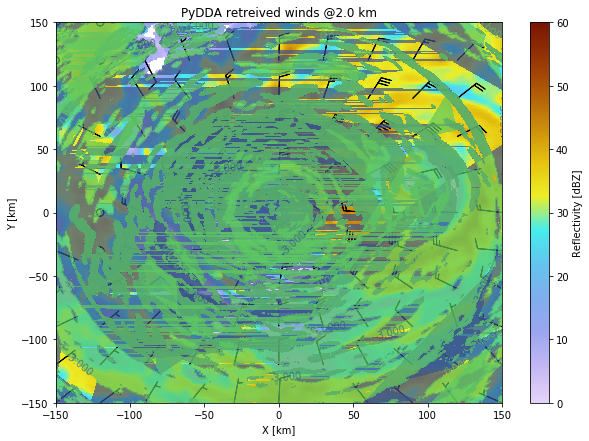

In [16]:
import pyart
import pydda
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Set initialization and do retrieval
u_init, v_init, w_init = pydda.initialization.make_constant_wind_field(g2, vel_field='VT')

new_grids = pydda.retrieval.get_dd_wind_field([g2],
                                              u_init, v_init, w_init,
                                              vel_name='VT', refl_field='DT',
                                              mask_outside_opt=True)
# Make a neat plot
fig = plt.figure(figsize=(10,7))
ax = pydda.vis.plot_horiz_xsection_barbs(new_grids, background_field='DT', 
                                        level=1,vmin=0, vmax=60,
                                        w_vel_contours=[-3,0,3],
                                        barb_spacing_x_km=30.0,
                                        barb_spacing_y_km=30.0)
#ax.set_xticks(np.arange(150.5, 153, 0.1))
#ax.set_yticks(np.arange(-36, -32.0, 0.1))
#ax.set_xlim([151.0, 151.35])
#ax.set_ylim([-34.15, -33.9])
plt.show(ax)


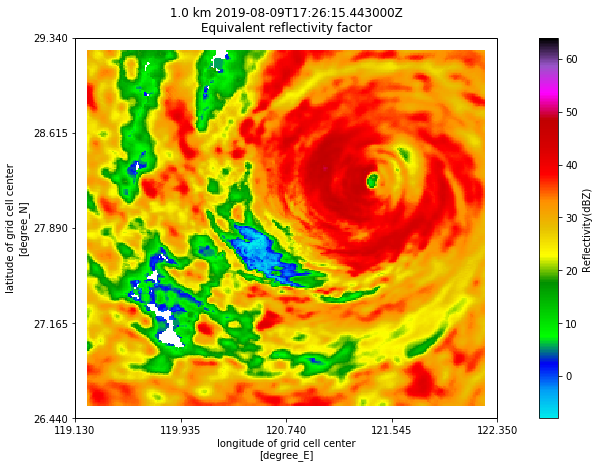

In [24]:
display = pyart.graph.GridMapDisplay(grids2)
fig = plt.figure(figsize=[15, 7])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# parameters
level = 3
vmin = -8
vmax = 64
lat = 36.5
lon = -98.0

# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
#display.plot_basemap(lon_lines = np.arange(-104, -93, 2) )
display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
                 cmap = pyart.graph.cm.NWSRef)